In [50]:
import pandas as pd
pd.set_option("display.max_columns", 100)
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CSV_DATA = Path().cwd().parent.parent / "data/1_transformed"

In [51]:
df = pd.read_csv(CSV_DATA/'summary/ride_summary.csv')
df['start_date'] = pd.to_datetime(df['start_date'])
df['start_time'] = pd.to_timedelta(df['start_time'])
df['end_time'] = pd.to_timedelta(df['end_time'])

In [52]:
df.head()

,ride_id,start_date,start_time,end_time,biker_weight_lbs,bike_weight,bag_weight,avg_speed,avg_cruising_speed,total_ride_time_sec,total_moving_time_sec,total_distance_mi,total_ascent_ft,total_descent_ft,avg_heart_rate,avg_power,avg_cadence,avg_ambient_temp_F
0,0x5b086853,2018-05-25,0 days 19:47:31,0 days 20:27:31,220,25,5,13.720594,14.267175,2401.0,1736.0,6.991217,220.1551,237.8725,NaN,118.773678,NaN,NaN
1,0x5b3c1e5a,2018-07-04,0 days 01:09:46,0 days 01:42:05,220,25,5,13.615799,14.215438,1940.0,1737.0,6.994353,152.5665,180.1269,NaN,107.400150,NaN,NaN
2,0x5ccb413c,2019-05-02,0 days 19:13:00,0 days 19:53:00,220,25,5,13.784195,14.574504,2401.0,2143.0,8.865922,300.5396,300.5396,NaN,124.479375,NaN,NaN
3,0x5cccc63c,2019-05-03,0 days 22:52:44,0 days 23:53:54,220,25,5,11.228317,12.081964,3671.0,2725.0,9.516836,333.3496,280.1974,NaN,86.208290,NaN,NaN
4,0x5cdbff9c,2019-05-15,0 days 12:01:32,0 days 12:37:36,220,25,5,14.256866,14.701154,2165.0,1942.0,8.029630,255.2618,211.2964,NaN,132.845473,NaN,NaN


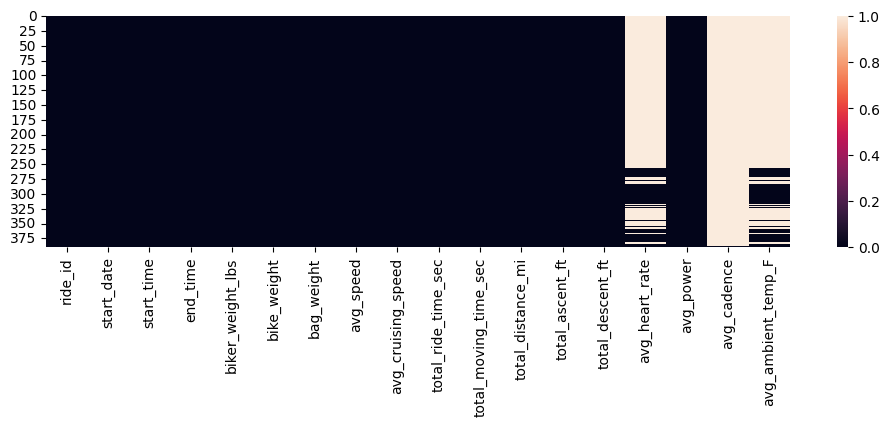

In [53]:
# Check for nulls in sensor columns
_ = plt.figure(figsize=(12,3))
_ = sns.heatmap(df.isna())

In [54]:
total_rides = df.shape[0]
rides_with_watch = total_rides - df['avg_heart_rate'].isna().sum()
percent_with_watch = 100.0* (rides_with_watch / total_rides)
print(f'Of the total {total_rides} rides, only {rides_with_watch} of them have watch sensor data ({round(percent_with_watch,2)}%)')

Of the total 390 rides, only 85 of them have watch sensor data (21.79%)


In [55]:
df['ride_year'] = df['start_date'].dt.year
df['ride_month'] = df['start_date'].dt.month
df['ride_dow'] = df['start_date'].dt.day_name()

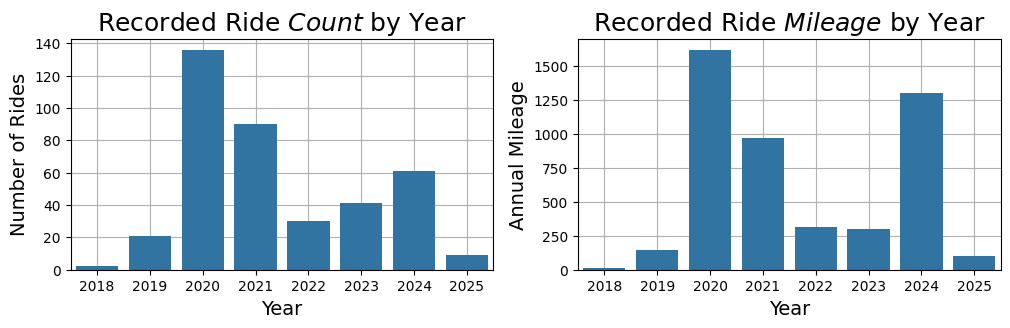

In [56]:
df_yearly_rides = df[['ride_year','total_distance_mi']].groupby('ride_year').count().rename(columns={'total_distance_mi':'ride_count'}).reset_index()
df_yearly_miles = df[['ride_year','total_distance_mi']].groupby('ride_year').sum().rename(columns={'total_distance_mi':'yearly_ride_mileage'}).reset_index()

fig, axes = plt.subplots(1,2, figsize=(12,3))
_ = sns.barplot(df_yearly_rides, x='ride_year', y='ride_count', ax=axes[0])
_ = sns.barplot(df_yearly_miles, x='ride_year', y='yearly_ride_mileage', ax=axes[1])
_ = axes[0].set_xlabel('Year', fontsize=14)
_ = axes[0].set_ylabel('Number of Rides', fontsize=14)
_ = axes[0].set_title('Recorded Ride $Count$ by Year', fontsize=18)
_ = axes[0].grid()
_ = axes[0].set_axisbelow(True)
_ = axes[1].set_xlabel('Year', fontsize=14)
_ = axes[1].set_ylabel('Annual Mileage', fontsize=14)
_ = axes[1].set_title('Recorded Ride $Mileage$ by Year', fontsize=18)
_ = axes[1].grid()
_ = axes[1].set_axisbelow(True)

In [57]:
df.total_distance_mi.sum()

np.float64(4762.263833227133)

## Ride Heatmap by Year

In [61]:
filt_year=2020
agg_column = 'total_distance_mi'
agg_method = 'sum'
####
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_filt_year = df.copy().loc[df['ride_year']==2020,:]
df_filt_year['start_date'] = df_filt_year['start_date'].dt.date
df_grouped = df_filt_year.groupby(['start_date','ride_dow'])[agg_column].agg(agg_method).reset_index()
pivot_df = df_grouped.pivot_table(index='start_date', columns='ride_dow', values=agg_column, fill_value=0.0).reindex(columns=days_order)
pivot_df= pivot_df.rename(columns={full:short for full,short in zip(days_order, ['M','T','W','Th','F','Sa','Su'])})

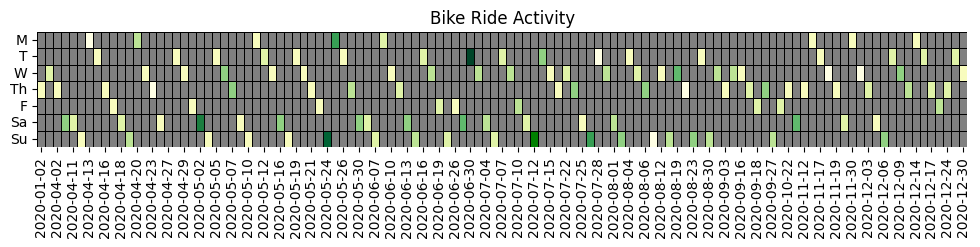

In [67]:
cmap = plt.get_cmap('YlGn',10)
cmap.set_under('grey')#Colour values less than vmin in white
cmap.set_over('green')# colour valued larger than vmax in red 

_ = plt.figure(figsize=(12, 1.5))
_ = sns.heatmap(pivot_df.T, cmap=cmap, linewidths=.5, linecolor='black', square=False, annot=False, cbar=False, vmin=0.005, vmax=50.0)
_ = plt.title('Bike Ride Activity')
_ = plt.xlabel('')
_ = plt.ylabel('')